In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal as mvn

In [2]:
mu = np.array([0,2])
cov = np.array([[1,0.8],[0.8,6]])

In [3]:
r = mvn.rvs(mean=mu,cov=cov, size=1000)

In [4]:
print(r)

[[ 0.84992303  3.86090919]
 [ 0.91126183  7.83447798]
 [-0.9064433  -1.78828805]
 ...
 [-0.48171776 -1.11776672]
 [-1.38141424  2.07574404]
 [-1.70300222 -1.64362324]]


In [5]:
x = r[:,0]
y = r[:,1]

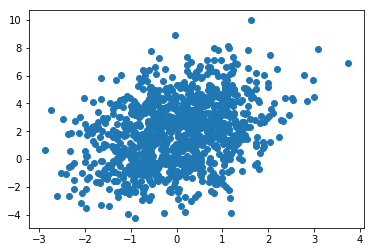

In [6]:
plt.scatter(x,y)

# Using Numpy

In [7]:
r = np.random.multivariate_normal(mean=mu,cov=cov,size=1000)
print(r)

[[-0.95488281  4.77499582]
 [-1.24843113 -1.71625975]
 [ 0.91069847  3.04792116]
 ...
 [-0.56145213  0.66717997]
 [-1.14911196  1.07097859]
 [-0.35533385  0.10013437]]


In [8]:
x = r[:,0]
y = r[:,1]

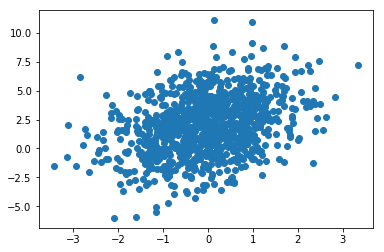

In [9]:
plt.scatter(x,y)

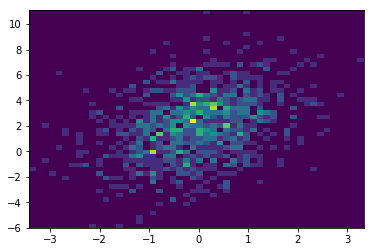

In [10]:
plt.hist2d(x,y,bins=50)
plt.show()

# Usando en muestreo de Gibbs

In [71]:
def GetBiNormal(N = 100,mu=[],sigma=[],rho = 0.8):
    
    mux = mu[0]
    muy = mu[1]   
    sigmax = sigma[0]
    sigmay = sigma[1]
    
    s1  = sigmax*np.sqrt(1-rho**2)
    s2  = sigmay*np.sqrt(1-rho**2)
    
    
    r = np.zeros((N,2))
    
    x0 = 0.
    y0 = 0.
    
    r[0,:] = x0,y0
    
    y = y0
    
    for i in range(1,N):
        
        mx = mux + rho*(y-muy)*(sigmax)/sigmay     
        x = np.random.normal(mx,s1)
        r[i,0] = x
        my = muy + rho*(x-mux)*(sigmay)/sigmax
        y = np.random.normal(my,s2)
        r[i,1] = y
       
    return r

In [72]:
r = GetBiNormal(N = 10000, mu=[1.,5.],sigma=[1.2,5.0],rho=0.4)

In [73]:
x = r[:,0]
y = r[:,1]

In [74]:
print(np.mean(x),np.mean(y))

(0.9787656574851118, 4.953174897683074)


(-20, 20)

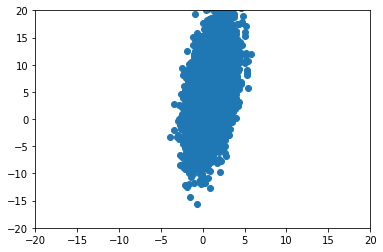

In [75]:
plt.scatter(x,y)
plt.xlim(-20,20)
plt.ylim(-20,20)

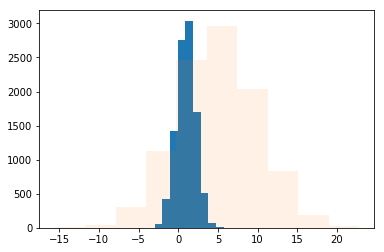

In [76]:
plt.hist(x)
plt.hist(y,alpha=0.1)
plt.show()